## 社会网络分析

模拟和研究一组以网络形式存在的社会实体之间关系的方法。实体可以是人、计算机或网页，关系可以相类似的人或事物、联系实体的连接(link)或友情。


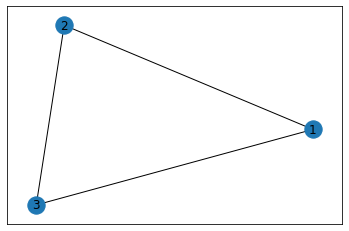

In [7]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(3,2)
nx.draw_networkx(G)
plt.show()

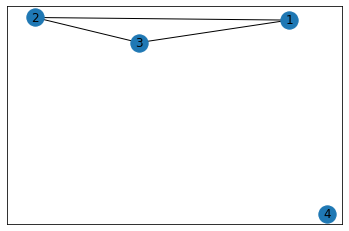

In [10]:
G.add_nodes_from([3,4])
nx.draw_networkx(G)
plt.show()

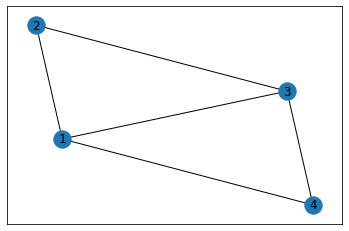

In [20]:
G.add_edge(3,4)
G.add_edges_from([(2,3),(4,1)])
nx.draw_networkx(G)
plt.show()

使用`nodes.()`能够获得节点集合，同样使用`.edges()`能够给出图中边的列表，由相连接的节点组成：

In [21]:
G.nodes()

NodeView((1, 2, 3, 4))

In [22]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (2, 3), (3, 4)])

描述图的方法有多种，邻接表(adjacency list)列出每个节点的邻居节点，与`G.nodes()`用法相同，`list[0]`包含第一个节点的所有邻居节点。

In [30]:
G.adjacency()

In [31]:
nx.to_dict_of_dicts(G)

{1: {2: {}, 3: {}, 4: {}},
 2: {1: {}, 3: {}},
 3: {1: {}, 2: {}, 4: {}},
 4: {3: {}, 1: {}}}

可将图描述为一个边的集合，输出结果中每个元组的第三个元素是边的属性，每一个边可以有一个或多个属性。创建的图很简单，下面的图不包含任何属性。

In [32]:
nx.to_edgelist(G)

EdgeDataView([(1, 2, {}), (1, 3, {}), (1, 4, {}), (2, 3, {}), (3, 4, {})])

In [34]:
nx.to_numpy_matrix(G)

matrix([[0., 1., 1., 1.],
        [1., 0., 1., 0.],
        [1., 1., 0., 1.],
        [1., 0., 1., 0.]])

In [42]:
import scipy

In [44]:
#nx.to_scipy_sparse_matrix(G) bug

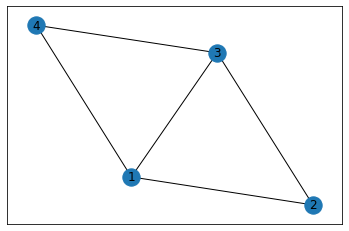

In [47]:
G.add_edge(1,3)
nx.draw_networkx(G)
plt.show()

In [48]:
G.degree()

DegreeView({1: 3, 2: 2, 3: 3, 4: 2})

对于规模较大的图，这样的度量方式较为简陋，输出字典都有记录。这种情况下往往使用节点度的直方图来近似其分布。
下图中建立一个具有10000个节点、连接概率为1%的随机网络。提取该图的节点度直方图。

In [55]:
#plt.hist(nx.fast_gnp_random_graph(1000,0.01).degree())

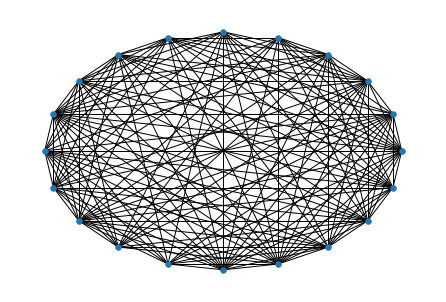

In [53]:
import networkx as ne #导入建网络模型包，命名ne
import matplotlib.pyplot as mp #导入科学绘图包，命名mp
#erdos renyi graphy
rg=ne.erdos_renyi_graph(20,0.8)
ps=ne.shell_layout(rg)#布置框架
ne.draw(rg,ps,with_labels=False,node_size=30)
mp.show()

### 5.2 图算法
为从图中得到见解，开发了很多算法。

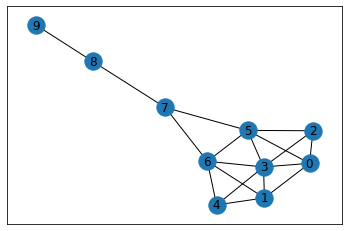

In [56]:
G = nx.krackhardt_kite_graph()
nx.draw_networkx(G)
plt.show()

连通性：一个图中的两个节点至少有一条路径，那么就是连通的。
利用NetworkX的库检查两个节点之间是否存在路径、计算最短路径及路径长度。


In [58]:
print(nx.has_path(G,source=1,target=9))
print(nx.shortest_path(G,source=1,target=9))
print(nx.shortest_path_length(G,source=1,target=9))


True
[1, 6, 7, 8, 9]
4


#### 中心性
中介中心性(betweenness Centrality)这种类型的中心性以节点的最短路径数表示节点的重要性。中介中心性高的节点是网络的核心部分。
有很大最短路径通过中介中心性高的节点。

In [59]:
nx.betweenness_centrality(G)

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

- 度中心性，一个节点的度中心性可以简单理解为与本节点有直接联系的节点占其余节点总数的百分比。

In [60]:
nx.degree_centrality(G)

{0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 0.5555555555555556,
 6: 0.5555555555555556,
 7: 0.3333333333333333,
 8: 0.2222222222222222,
 9: 0.1111111111111111}

接近中心性：

In [61]:
nx.closeness_centrality(G)

{0: 0.5294117647058824,
 1: 0.5294117647058824,
 2: 0.5,
 3: 0.6,
 4: 0.5,
 5: 0.6428571428571429,
 6: 0.6428571428571429,
 7: 0.6,
 8: 0.42857142857142855,
 9: 0.3103448275862069}

特征向量中心性：有向图，用节点表示网页，边表示连接。

In [62]:
nx.eigenvector_centrality(G)

{0: 0.3522089813920359,
 1: 0.3522089813920358,
 2: 0.28583473531632403,
 3: 0.48102048812210046,
 4: 0.28583473531632403,
 5: 0.3976910106255469,
 6: 0.39769101062554685,
 7: 0.19586185175360382,
 8: 0.048074775014202924,
 9: 0.011164058575824235}

In [63]:
nx.clustering(G)

{0: 0.6666666666666666,
 1: 0.6666666666666666,
 2: 1.0,
 3: 0.5333333333333333,
 4: 1.0,
 5: 0.5,
 6: 0.5,
 7: 0.3333333333333333,
 8: 0,
 9: 0}